In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as mtick
%matplotlib inline

### Lectura de archivos

In [ ]:
#Google colab
#from google.colab import drive
#drive.mount('/content/drive')
#root = '/content/drive/MyDrive/0AccTeam/'

In [ ]:
root = './Blueberry'

In [ ]:
review_data = pd.read_csv(root+"reseña.csv")

In [ ]:
#Eliminar el texto para liberar memoria, ya que este análisis no utilizará el texto
del review_data["texto"]

In [ ]:
negocio_data = pd.read_csv(root+'negocio.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,49,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
negocio_data.columns

Index(['negocio_id', 'nombre', 'direccion', 'ciudad', 'estado',
       'codigo_postal', 'latitud', 'longitud', 'estrellas', 'cantidad_reseñas',
       'abierto', 'acepta_tarjeta_credito', 'tiene_parqueo_bicicletas',
       'adecuado_para_niños', 'parqueo', 'solo_con_cita', 'rango_precios',
       'categorias', 'atencion_lunes', 'atencion_martes', 'atencion_miercoles',
       'atencion_jueves', 'atencion_viernes', 'atencion_sabado',
       'atencion_domingo', 'permite_perros', 'tiene_wifi',
       'codigo_de_vestimenta', 'para_llevar', 'nivel_de_ruido',
       'acepta_reservaciones', 'adecuado_para_grupos', 'tiene_tv',
       'vende_alcohol', 'entregas_a_domicilio', 'mesas_al_aire_libre',
       'tiene_mesero', 'adecuado_para_sillas_de_ruedas', 'acepta_seguro',
       'ambiente', 'adecuado_para_comer', 'tiene_happy_hour', 'acepta_bitcoin',
       'acepta_llevar_bebida_propia', 'adecuado_para_bailar',
       'tiene_guardarropa', 'mejores_noches', 'musica', 'permite_fumar',
       'restri

In [ ]:
#Categorías extraidas de la plataforma
categories = ["Active Life",
              "Arts & Entertainment",
              "Automotive","Education",
              "Event Planning & Services",
              "Food",
              "Local Flavour",
              "Local Flavor",
              "Local Services",
              "Nightlife",
              "Pets",
              "Professional Services",
              "Public Services & Government",
              "Restaurants",
              "Shopping",
              "Beauty & Spas",
              "Financial Services",
              "Health & Medical",
              "Home Services",
              "Hotels & Travel",
              "Mass Media",
              "Real Estate",
              "Religious Organizations"]

In [ ]:
def getCategorie(categorie_string):
    categories_set =  set(categorie_string.split(", ")) if type(categorie_string) == str else set()
    intersection = categories_set.intersection(set(categories))
    return "Other" if len(intersection) == 0 else intersection.pop()

In [ ]:
cateogories_data["categoria"] = cateogories_data.categorias.apply(getCategorie)

In [ ]:
pd.to_csv(root+'negocio_categorias.csv')

### Análisis de Tipo de NEGOCIOS

In [ ]:
cateogories_data = pd.read_csv(root+'negocio_categorias.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,49,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
grouped_categories = ((cateogories_data.groupby("categoria").count()/n)*100).sort_values(by="negocio_id",ascending=False)

In [ ]:
n = cateogories_data.shape[0]

In [ ]:
# Agregar el porcentaje a las barras
# Agrupar las 3 categorías a elegir
# Agrupar las 10 últimas categorías como OTRAS
# Agregar título

Text(0.5, 0, 'Porcentajes')

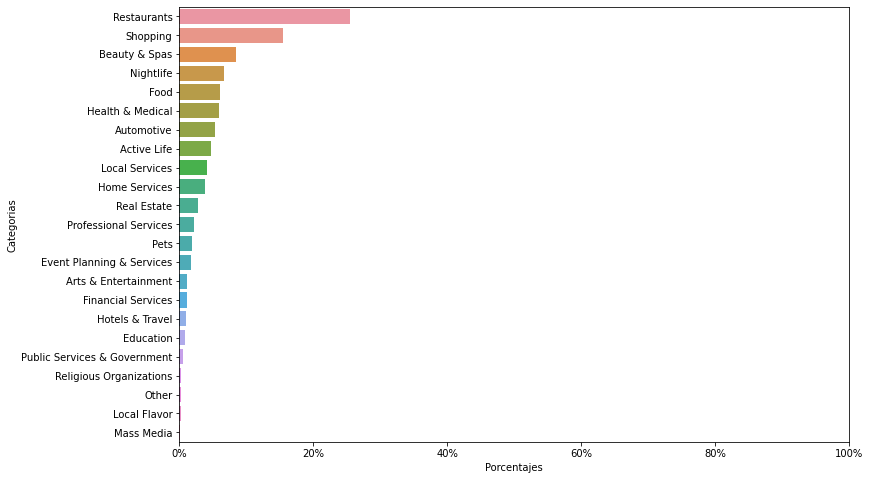

In [ ]:
plt.figure(figsize=(12,8))
plt.xlim([0, 100])
fmt = "%.0f%%"
xticks = mtick.FormatStrFormatter(fmt)
ax = sns.barplot(y="categoria", x="negocio_id", data=grouped_categories.reset_index())
ax.xaxis.set_major_formatter(xticks)
ax.set_ylabel("Categorias")
ax.set_xlabel("Porcentajes")

In [ ]:
# quesesto
grouped_categories.loc[["Restaurants","Food", "Nightlife"]].sum()[0]

38.204567976407944

In [ ]:
negocios_consumo = cateogories_data[cateogories_data.categoria.isin(["Restaurants","Food", "Nightlife"])].negocio_id

In [ ]:
# cantidad de negocios
review_data.negocio_id.count()

5124441

In [ ]:
review_data_consumo = review_data[review_data.negocio_id.isin(negocios_consumo)]

In [ ]:
# cantidad de negocios de consumo
review_data_consumo.negocio_id.count()

3505934

In [1]:
# porcentaje de negocios de consumo 
(3505934 / 5124441) *100

68.41593063516586

In [ ]:
#Google colab
#consumo_dir = '/content/drive/MyDrive/0AccTeam/datasets_consumo/'

consumo_dir = './datasets_consumo'

* 3 de 23 categorías. 
* Estas 3 categorías representan el 38% de los negocios  
* Estas 3 categorías representan el 68% de las reseñas


In [ ]:
review_data = review_data[review_data.negocio_id.isin(negocios_consumo)]

In [ ]:
review_data.to_csv(consumo_dir+ "reseña_consumo.csv", index=False)

In [ ]:
review_data_consumo.to_csv(consumo_dir+ "reseña_sin_comentario_consumo.csv", index=False)

In [ ]:
cateogories_data[cateogories_data.negocio_id.isin(negocios_consumo)].to_csv(consumo_dir+ "negocio_consumo.csv", index=False)

### !!!!!!!!!! Obtener el porcentaje de reseñas de la categorías de consumo

In [ ]:
cateogories_data = 0

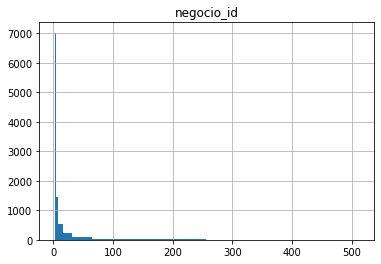

In [ ]:
%matplotlib 
negocio_data[["negocio_id", "nombre"]].groupby("nombre").count().hist(bins=(2,4,8,16,32,64,128,256,512))
plt.show()

In [ ]:
x = negocio_data.groupby(['nombre']).count()[negocio_data.groupby(['nombre']).count().negocio_id > 0].sort_values(by="negocio_id",ascending=False).reset_index()

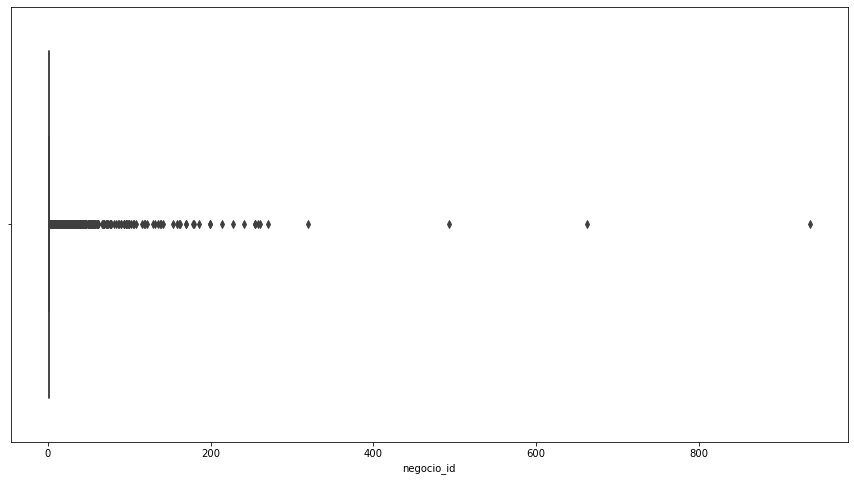

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=x["negocio_id"])

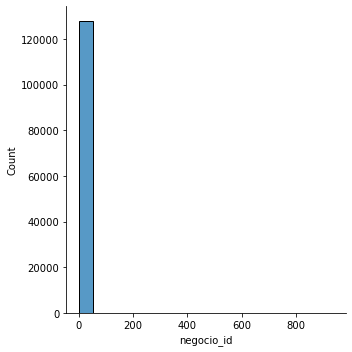

In [ ]:
sns.displot(data=x, x="negocio_id")

In [ ]:
negocio_data["categoria"] = negocio_data.categorias.apply(getCategorie)

In [ ]:
negocio_data.to_csv("negocio_categorias.csv",index=False)

In [ ]:
review_data

,reseña_id,usuario_id,negocio_id,estrellas,util,gracioso,genial,fecha
0,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1.0,1.0,0.0,2013-12-07 03:16:52
1,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1.0,0.0,0.0,2015-12-05 03:18:11
2,L2O_INwlrRuoX05KSjc4eg,5vD2kmE25YBrbayKhykNxQ,nlxHRv1zXGT0c0K51q3jDg,5.0,2.0,0.0,0.0,2013-05-07 07:25:25
3,ZayJ1zWyWgY9S_TRLT_y9Q,aq_ZxGHiri48TUXJlpRkCQ,Pthe4qk5xh4n-ef-9bvMSg,5.0,1.0,0.0,0.0,2015-11-05 23:11:05
4,lpFIJYpsvDxyph-kPzZ6aA,dsd-KNYKMpx6ma_sRWCSkQ,FNCJpSn0tL9iqoY3JC73qw,5.0,0.0,0.0,0.0,2017-07-18 18:31:54
...,...,...,...,...,...,...,...,...
5124438,43ugcDASS-mGv0eYozge_g,kyxGYZpa4UNmA7Q0gmQmYA,H85um1dDQHAeUJ6AqYIqww,1.0,0.0,0.0,0.0,2019-12-10 12:07:55
5124439,LAzw2u1ucY722ryLEXHdgg,6DMFD3BRp-MVzDQelRx5UQ,XW2kaXdahICaJ27A0dhGHg,1.0,1.0,0.0,1.0,2019-12-11 01:07:06
5124440,gMDU14Fa_DVIcPvsKtubJA,_g6P8H3-qfbz1FxbffS68g,IsoLzudHC50oJLiEWpwV-w,3.0,1.0,3.0,1.0,2019-12-10 04:15:00
5124441,-z_MM0pAf9RtZbyPlphTlA,lBuAACBEThaQHQGMzAlKpg,VKVDDHKtsdrnigeIf9S8RA,3.0,2.0,0.0,0.0,2018-07-05 18:45:21


In [ ]:
usuario_data = pd.read_csv("usuario.csv")

In [ ]:
usuario_data.shape

(1574962, 21)